In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

# 人工データを作成

In [2]:
x = np.linspace(-2.5, 2.5, num=50)
t_1 = x**2
t_2 = np.sin(x)
t_3 = np.abs(x)
t_4 = np.heaviside(x, 0.5)

train_df = pd.DataFrame({
    'x': x,
    't_1': t_1,
    't_2': t_2,
    't_3': t_3,
    't_4': t_4
})

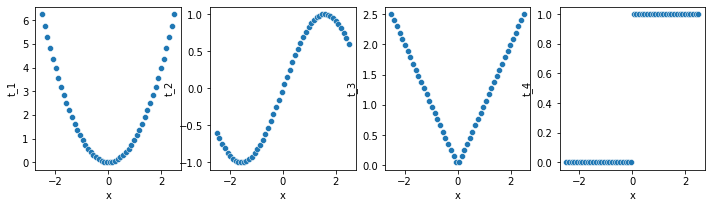

In [3]:
fig, axes = plt.subplots(1,4, figsize=(12,3))
sns.scatterplot(x='x', y='t_1', data=train_df, ax=axes[0])
sns.scatterplot(x='x', y='t_2', data=train_df, ax=axes[1])
sns.scatterplot(x='x', y='t_3', data=train_df, ax=axes[2])
sns.scatterplot(x='x', y='t_4', data=train_df, ax=axes[3])

# TensorFlow (keras) でモデルを定義

In [5]:
def build_model():
  # ネットワークを定義する。
  # ２層の全結合層 (Dense layer) を結合したネットワークを構築する。
  model = keras.Sequential([
    keras.layers.Dense(3, activation='tanh', input_shape=[1]),
    keras.layers.Dense(1)
  ])

  # optimizer とは、更新方式のこと。逐次的な勾配降下法 (SGD) を使用する。
  optimizer = tf.keras.optimizers.SGD()

  # 誤差関数には二乗誤差を使用する。 mse = Mean Squared Error
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
  return model

In [6]:
# ４つの異なるデータそれぞれについて予測モデルを構築する。
model_1 = build_model()
model_2 = build_model()
model_3 = build_model()
model_4 = build_model()

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


隠れ１層目のパラメータ数は６、出力層のパラメータ数は４となっている。これはレジュメのネットワークのパラメータ数と一致する。

# 学習を実行

In [7]:
EPOCHS = 500

history = model_1.fit(x=train_df[['x']], y=train_df['t_1'], epochs=EPOCHS)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 9.7264 - mse: 9.7264
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 9.5605 - mse: 9.5605
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 7.2098 - mse: 7.2098
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 7.1669 - mse: 7.1669
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 7.3261 - mse: 7.3261
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 6.1670 - mse: 6.1670
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 6.4551 - mse: 6.4551
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 5.5861 - mse: 5.5861
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 5.9742 - mse: 5.9742
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 5.8799 - mse: 5.8799
Epoch 11/500
2/2 [==============================] - 0s 5ms/step - loss: 5.1911 

In [8]:
# verbose=0 でサイレント実行
model_2.fit(x=train_df[['x']], y=train_df['t_2'], epochs=EPOCHS, verbose=0)
model_3.fit(x=train_df[['x']], y=train_df['t_3'], epochs=EPOCHS, verbose=0)
model_4.fit(x=train_df[['x']], y=train_df['t_4'], epochs=EPOCHS, verbose=0)

# 予測を実行

In [9]:
pred_1 = model_1.predict(train_df[['x']]).flatten()
pred_2 = model_2.predict(train_df[['x']]).flatten()
pred_3 = model_3.predict(train_df[['x']]).flatten()
pred_4 = model_4.predict(train_df[['x']]).flatten()

# 学習結果と、データをプロット

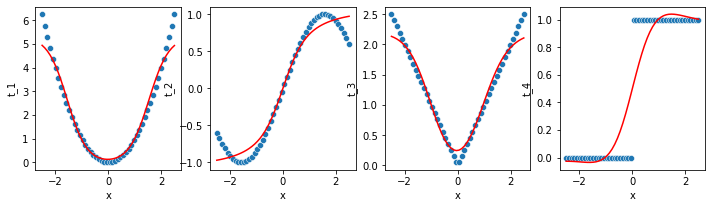

In [10]:
fig, axes = plt.subplots(1,4, figsize=(12,3))
sns.scatterplot(x='x', y='t_1', data=train_df, ax=axes[0])
sns.scatterplot(x='x', y='t_2', data=train_df, ax=axes[1])
sns.scatterplot(x='x', y='t_3', data=train_df, ax=axes[2])
sns.scatterplot(x='x', y='t_4', data=train_df, ax=axes[3])

sns.lineplot(x=train_df['x'], y=pred_1, color='r', ax=axes[0])
sns.lineplot(x=train_df['x'], y=pred_2, color='r', ax=axes[1])
sns.lineplot(x=train_df['x'], y=pred_3, color='r', ax=axes[2])
sns.lineplot(x=train_df['x'], y=pred_4, color='r', ax=axes[3])

# 追加で 1000 回学習を回す

In [11]:
EPOCHS = 1000

model_1.fit(x=train_df[['x']], y=train_df['t_1'], epochs=EPOCHS, verbose=0)
model_2.fit(x=train_df[['x']], y=train_df['t_2'], epochs=EPOCHS, verbose=0)
model_3.fit(x=train_df[['x']], y=train_df['t_3'], epochs=EPOCHS, verbose=0)
model_4.fit(x=train_df[['x']], y=train_df['t_4'], epochs=EPOCHS, verbose=0)

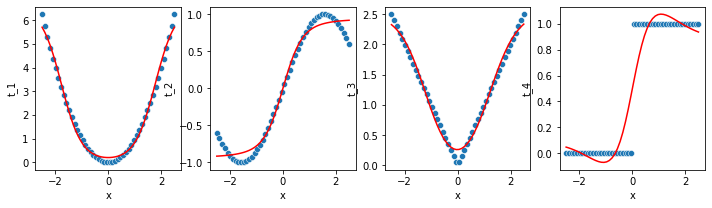

In [12]:
pred_1 = model_1.predict(train_df[['x']]).flatten()
pred_2 = model_2.predict(train_df[['x']]).flatten()
pred_3 = model_3.predict(train_df[['x']]).flatten()
pred_4 = model_4.predict(train_df[['x']]).flatten()

fig, axes = plt.subplots(1,4, figsize=(12,3))
sns.scatterplot(x='x', y='t_1', data=train_df, ax=axes[0])
sns.scatterplot(x='x', y='t_2', data=train_df, ax=axes[1])
sns.scatterplot(x='x', y='t_3', data=train_df, ax=axes[2])
sns.scatterplot(x='x', y='t_4', data=train_df, ax=axes[3])

sns.lineplot(x=train_df['x'], y=pred_1, color='r', ax=axes[0])
sns.lineplot(x=train_df['x'], y=pred_2, color='r', ax=axes[1])
sns.lineplot(x=train_df['x'], y=pred_3, color='r', ax=axes[2])
sns.lineplot(x=train_df['x'], y=pred_4, color='r', ax=axes[3])

ちょっとだけ結果が良くなった。